In [30]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st 
import statsmodels.stats.power as smp
from statsmodels.stats import proportion
import warnings
warnings.filterwarnings("ignore", category=UserWarning) 

## Задание 1: 
Проанализируйте конкурентов на рынке (SkyEng, Lingvoleo и прочие) и сформулируйте гипотезу по улучшению первого экрана лендинга (https://english22.tilda.ws/)

1. Если добавить на главную страницу сайта форму регистрации (для обратной связи), это увеличит конверсию пользователей на 5%, потому что пользоватлем будет удобнее и быстрее оставлять заявки
2. Если на главную страницу сайта добавить инормацию об обучающих тарифах, это увеличит конверсию пользователей на 7%, т.к. пользователи смогут быстрее получать информацию о стоимости обучения без прямого контакта со школой


## Задание 2
Подведите результаты эксперимента в экселе по следующим данным (df) Стат значимо ли отличается ARPPU в двух группах ? Какие рекомендации дадите менеджеру?

In [31]:
# Получим данные из файла
df = pd.read_csv('./ab_stats (2).csv')
df.head()

,revenue,num_purchases,purchase,ab_group,av_site visit
0,0.0,0,0,A,9.040174
1,0.0,0,0,A,4.811628
2,0.0,0,0,A,7.342623
3,0.0,0,0,A,7.744581
4,0.0,0,0,A,10.511814


In [32]:
# проверим статитсики данных
df.describe()

,revenue,num_purchases,purchase,av_site visit
count,23652.000000,23652.000000,23652.000000,23652.000000
mean,0.324689,0.043590,0.020717,7.013112
std,9.557730,1.079403,0.142438,3.154584
min,0.000000,0.000000,0.000000,-12.073486
25%,0.000000,0.000000,0.000000,5.173787
50%,0.000000,0.000000,0.000000,7.007936
75%,0.000000,0.000000,0.000000,8.864119
max,1303.609284,152.000000,1.000000,22.446822


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23652 entries, 0 to 23651
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   revenue        23652 non-null  float64
 1   num_purchases  23652 non-null  int64  
 2   purchase       23652 non-null  int64  
 3   ab_group       23652 non-null  object 
 4   av_site visit  23652 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 924.0+ KB


In [34]:
new_df = df.drop_duplicates()

In [35]:
# Рассчитаем ARPPU для групп
revenue_A = new_df[new_df['ab_group'] == 'A']['revenue'].sum()
paying_users_a = new_df[(df['ab_group'] == 'A') & (new_df['purchase'] > 0)]['purchase'].count()
arppu_a = revenue_A/paying_users_a

revenue_B = new_df[new_df['ab_group'] == 'B']['revenue'].sum()
paying_users_b = new_df[(df['ab_group'] == 'B') & (new_df['purchase'] > 0)]['purchase'].count()
arppu_b = revenue_B/paying_users_b
arppu_b
(arppu_a, arppu_b)

(18.698468640624995, 12.36211875641025)

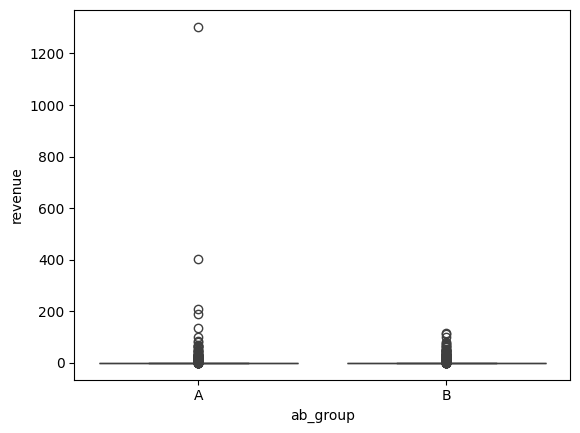

In [36]:
# Построим боксплот для revenue
revenue_A = new_df[new_df['ab_group'] == 'A']['revenue']
sns.boxplot(data=new_df, x='ab_group', y='revenue')
plt.show()

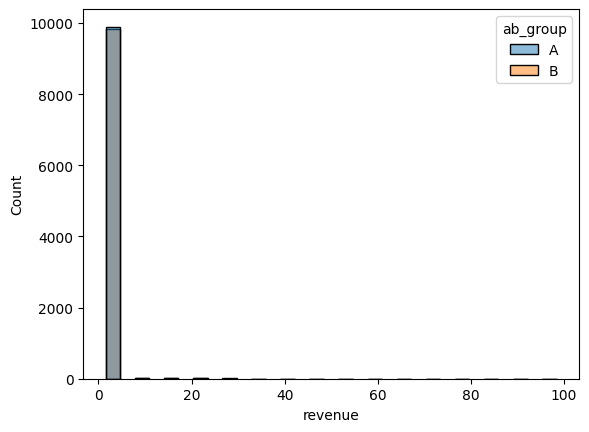

In [37]:
sns_df = new_df[new_df['revenue']<100]
sns.histplot(data=sns_df, x='revenue', hue='ab_group', shrink=0.5)
plt.show()

In [38]:
# Выделим группы в отдельные датасеты и проверим их на нормальность
group_a = new_df[new_df['ab_group'] == 'A']
group_b = new_df[new_df['ab_group'] == 'B']
f'Количество человек в группе А = {group_a.revenue.count()}, количество человек в группе В = {group_b.revenue.count()}'

'Количество человек в группе А = 9989, количество человек в группе В = 9930'

In [39]:
# ARPPU
control = group_a[group_a['revenue'] > 0]['revenue']
test = group_b[group_b['revenue'] > 0]['revenue']

statistic, p_val_a = st.shapiro(control)
statistic, p_val_b = st.shapiro(test)
f'ARPPU_A: p_a = {p_val_a}, p_b = {p_val_b}' # отклоняем гипотезу о нормальности распределения


'ARPPU_A: p_a = 2.4723388038366e-32, p_b = 1.599590675565433e-22'

In [40]:
# Испльзуем непараметрический критерий для оценки разницы ARPPU в двух исследуемых группах
control = group_a[group_a['revenue'] > 0]['revenue']
test = group_b[group_b['revenue'] > 0]['revenue']
test_stat, pvalue = st.mannwhitneyu(test, control)
print('ARPPU p-value = %.4f.' % (pvalue)) # нет статистически значимых различий между двумя группам

ARPPU p-value = 0.8872.


In [41]:
control = group_a[group_a['revenue'] > 0]['revenue'].count()
test = group_b[group_b['revenue'] > 0]['revenue'].count()
control, test

(256, 234)

# Выводы:
По данным A/B теста статистических различий между группами по ARPPU не было обнаружено. Следует увеличить размер выборки, чтобы обнаружиь разницу

# Задание 3
Мы хотим провести А/Б-тест для трех источников трафика. Нынешняя конверсия равна 5%,
мы ожидаем прирост в 0,2%.
Уровень доверия 97% и уровень мощности 87%.
Всего на наш продукт заходит 40 000 пользователей в месяц.

## 3.1
За сколько дней мы сможем протестировать гипотезу? И что вы можете посоветовать по
результатам подсчета?

С учетом размера выборки в 1 522 716 человек на 2 группы, число дней, необходимое для проведения теста равно (см.далее)

![размер выборки](./pictures/расчет_выборки_нов.png)

In [42]:
n = 1522706
users_month = 40000
days = (n/users_month)*30
f'Количество дней, необходимое для проведения теста = {round(days, 2)}'

'Количество дней, необходимое для проведения теста = 1142.03'

## 3.2
Допустим в задаче нет проблемы с количеством посетителей на сайт, тогда подведите
результаты тестирования, если у нас следующие результаты по количеству конверсии: 
1) 25 000
2) 30 000
3) 32 000

В соответствие с результатами теста: статистически значимые отличия обнаружены: 2 вариант лушче первого. 3 вариант лучше первого и второго
 
![check](./pictures/check.png)

## 4
Вы решили сравнивать метрику CPA в двух группах. Размер выборки - 2350 элементов в
каждой группе.
Для проверки нормальности распределения на выборке в 2350 наблюдений применили ,
критерий Шапиро-Уилка и получили p-value, равный 0.00002, alpha = 5%.
Какой бы вывод мы могли сделать в данном случае?
В этом случае какой статистический критерий для проверки первоначальной гипотезы тут лучше
всего подойдёт и почему ?

## Ответ
Критерий Шапиро-Уилка применяется с целью проверки гипотезы о том, что исследуемая выборка взята из генеральной совокупности с нормальным распределением (Н0). P value < 0.05 позволяет отклонить нулевую гипотезу, тем самым считая, что генеральная выборка не подчиняется нормальному распределению. В связи с этим для проверки гипотез следует применять непараметрические критерии, в данном случае - это критерий Манна-Уитни

## 5
Мы провели АБ-тест на увеличение average timespent per user. По итогам тестирования мы
получили следующие данные. Является ли результат статистически значимым с уровнем
доверия 80%? Какую версию мы выкатим на продакшн?
A) Средняя - 360, отклонение - 40, количество - 9802
B) Средняя - 352, отклонение - 58, количество - 9789

По результатам проверки АБ-теста, две группы статистически значимо различаются. Первая версия продукта значимо повышает среднее время пользователя

![check2](./pictures/check2.png)

In [43]:
# Дополнительно проверим статистически значимые различия между группами
first_sample = {'mean': 360,
                'std': 40,
                'number': 9802}
second_sample = {'mean': 352,
                'std': 58,
                'number': 9789}
res = st.ttest_ind_from_stats(mean1=first_sample['mean'], std1=first_sample['std'], nobs1=first_sample['number'], mean2=second_sample['mean'], std2=second_sample['std'], nobs2=second_sample['number'])
'{} нулевую гипотезу, т.к. {} {} 0.05'.format('Отклоняем', 'p value', '<' if res.pvalue < 0.05 else 'Не отклоняем', 'p value', '>')

'Отклоняем нулевую гипотезу, т.к. p value < 0.05'

## 6
Создайте техническую архитектуру проекта по аб тестированию продукта он-лайн кинотеатра
с учетом кросс-девайс аналитики по следующей гипотезе:
Если договориться с банком о 99% кэшбэке на подписку первого месяца, то это повысит
конверсию в подписку на 30%, благодаря упрощенному принятию решения со стороны
пользователя.
На схеме необходимо отобразить:
1) Управленческий процесс по договоренностям с внешними партнерами
2) Архитектуру данных с указанием систем, из которых будем скачивать данные
3) Внутрикомандное взаимодействие

## Решение
1, 3: ![AB_test](./pictures/AB_test_decomposition.png)

2. ![AB_test](./pictures/Architeture%20of%20data.drawio.png)